Stock Prediction Model with VTI - 3 Year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Loading ETF historical pricing from research paper 10/5/18 to 10/4/21
VTI = pd.read_csv('VTI_Original_Sample.csv')
VTI.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,10/5/2018,148.619995,148.949997,146.729996,147.630005,136.844757,3197900.0
1,10/8/2018,147.279999,147.759995,146.360001,147.520004,136.742798,2515600.0
2,10/9/2018,147.250000,148.020004,147.020004,147.259995,136.501785,3690600.0
3,10/10/2018,146.929993,146.949997,142.410004,142.570007,132.154419,6890300.0
4,10/11/2018,142.020004,142.970001,138.750000,139.529999,129.336487,11707900.0


In [3]:
#overview of the data
VTI.info()
VTI.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       754 non-null    object 
 1   Open       754 non-null    float64
 2   High       754 non-null    float64
 3   Low        754 non-null    float64
 4   Close      754 non-null    float64
 5   Adj Close  754 non-null    float64
 6   Volume     754 non-null    float64
dtypes: float64(6), object(1)
memory usage: 62.4+ KB


,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,169.732307,170.644483,168.572626,169.707188,162.033899,3.896398e+06
std,30.732722,30.613569,30.773917,30.703321,31.654363,2.481340e+06
min,113.650002,114.900002,109.489998,111.910004,106.353851,1.171000e+06
25%,146.419998,147.367496,145.607498,146.729996,137.703297,2.492600e+06
50%,159.720001,160.129997,158.399994,159.070000,151.245445,3.277600e+06
75%,194.792500,195.309994,193.240002,194.034996,187.676716,4.302725e+06
max,234.309998,234.649994,233.679993,234.369995,228.151382,2.227240e+07


In [4]:
#date range of the data
VTI['Date'] = pd.to_datetime(VTI['Date'])
print(f'Dataframe contains stock prices between {VTI.Date.min()} {VTI.Date.max()}') 
print(f'Total days = {(VTI.Date.max()  - VTI.Date.min()).days} days')

Dataframe contains stock prices between 2018-10-05 00:00:00 2021-10-04 00:00:00
Total days = 1095 days


In [5]:
# Plotting Historical performance of the ETF
layout = go.Layout(
    title='VTI ETF Price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price USD',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

VTI_data = [{'x':VTI['Date'], 'y':VTI['Close']}]
plot = go.Figure(data=VTI_data, layout=layout)


iplot(plot)

In [6]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [7]:
#Split the data into train and test sets
VTI = VTI.dropna()
X = np.array(VTI.index).reshape(-1,1)
Y = VTI['Adj Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [8]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [9]:
# First Model - Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)

In [10]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, lm.predict(X_train)))}\t{np.sqrt(mse(Y_test, lm.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, lm.predict(X_train))}\t{mape(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      12.94061016510642	13.95188982565081
MAPE      0.06340363257747687	0.06994117436212186



In [11]:
# Second Model - Logistic Regression
from sklearn.linear_model import LogisticRegression

#To avoid "continuous" error for Logistic Regression and KNN, convert data
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

clf = LogisticRegression()
clf.fit(X_train, training_scores_encoded)


#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)




C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [12]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, clf.predict(X_train)))}\t{np.sqrt(mse(Y_test, clf.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, clf.predict(X_train))}\t{mape(Y_test, clf.predict(X_test))}
'''
print(scores)




Metric           Train                Test        
RMSE      343.19632039100173	343.205561883735
MAPE      1.8566056985942925	1.8518626963275406



In [13]:
# Third Modal - KNN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
#%%time

#warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=2, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, training_scores_encoded)


params_optimal_knn = knn_cv.best_params_

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, training_scores_encoded)

y_train_predicted = knn.predict(X_train)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = knn.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)



Fitting 2 folds for each of 686 candidates, totalling 1372 fits


C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan

In [14]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, knn.predict(X_train)))}\t{np.sqrt(mse(Y_test, knn.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, knn.predict(X_train))}\t{mape(Y_test, knn.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      194.4659298410086	195.67219589759608
MAPE      0.9205157222279071	0.9233334863048507



In [15]:
# Fourth Model - Gaussian NB

#%%time

#warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB, MultinomialNB
param_grid = {'var_smoothing': [0.001, 0.01, 0.1, 1.0]}

gnb = GaussianNB()

gnb = GridSearchCV(gnb, param_grid, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)
gnb.fit(X_train, training_scores_encoded)

params_optimal = gnb.best_params_

gaussianNB_clf = GaussianNB(**params_optimal)

gaussianNB_clf.fit(X_train, training_scores_encoded) 

y_test_predicted = gaussianNB_clf.predict(X_test)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = gaussianNB_clf.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



In [16]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, gaussianNB_clf.predict(X_train)))}\t{np.sqrt(mse(Y_test, gaussianNB_clf.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, gaussianNB_clf.predict(X_train))}\t{mape(Y_test, gaussianNB_clf.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      194.50380026635924	194.10357214528386
MAPE      0.9180816398007743	0.9184250485095476



In [17]:
#5th Model LSTM

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

data = pd.read_csv('VTI_Original_Sample.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/5/2018,148.619995,148.949997,146.729996,147.630005,136.844757,3197900.0
1,10/8/2018,147.279999,147.759995,146.360001,147.520004,136.742798,2515600.0
2,10/9/2018,147.250000,148.020004,147.020004,147.259995,136.501785,3690600.0
3,10/10/2018,146.929993,146.949997,142.410004,142.570007,132.154419,6890300.0
4,10/11/2018,142.020004,142.970001,138.750000,139.529999,129.336487,11707900.0


In [18]:
data["Adj Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       754 non-null    object 
 1   Open       754 non-null    float64
 2   High       754 non-null    float64
 3   Low        754 non-null    float64
 4   Close      754 non-null    float64
 5   Adj Close  754 non-null    float64
 6   Volume     754 non-null    float64
dtypes: float64(6), object(1)
memory usage: 47.1+ KB


In [19]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(754, 1)

In [20]:
X_train = []
y_train = []

for i in range (60,754): #60 : timestep // 604 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(694, 60, 1)

In [22]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [23]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
22/22 - 10s - loss: 0.0384 - 10s/epoch - 455ms/step
Epoch 2/20
22/22 - 5s - loss: 0.0058 - 5s/epoch - 234ms/step
Epoch 3/20
22/22 - 5s - loss: 0.0050 - 5s/epoch - 208ms/step
Epoch 4/20
22/22 - 5s - loss: 0.0045 - 5s/epoch - 216ms/step
Epoch 5/20
22/22 - 5s - loss: 0.0046 - 5s/epoch - 216ms/step
Epoch 6/20
22/22 - 5s - loss: 0.0043 - 5s/epoch - 224ms/step
Epoch 7/20
22/22 - 5s - loss: 0.0043 - 5s/epoch - 223ms/step
Epoch 8/20
22/22 - 5s - loss: 0.0045 - 5s/epoch - 216ms/step
Epoch 9/20
22/22 - 4s - loss: 0.0035 - 4s/epoch - 174ms/step
Epoch 10/20
22/22 - 5s - loss: 0.0038 - 5s/epoch - 223ms/step
Epoch 11/20
22/22 - 5s - loss: 0.0036 - 5s/epoch - 228ms/step
Epoch 12/20
22/22 - 5s - loss: 0.0035 - 5s/epoch - 223ms/step
Epoch 13/20
22/22 - 5s - loss: 0.0035 - 5s/epoch - 218ms/step
Epoch 14/20
22/22 - 5s - loss: 0.0034 - 5s/epoch - 219ms/step
Epoch 15/20
22/22 - 5s - loss: 0.0044 - 5s/epoch - 213ms/step
Epoch 16/20
22/22 - 4s - loss: 0.0029 - 4s/epoch - 178ms/step
Epoch 17/20
22/

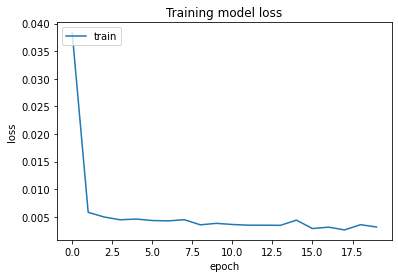

In [24]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
testData = pd.read_csv('VTI_Test_Data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(91, 60, 1)

In [26]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 1s 30ms/step


array([[1.0151075 ],
       [1.0188961 ],
       [1.0232935 ],
       [1.0279408 ],
       [1.0324795 ],
       [1.0361433 ],
       [1.0382962 ],
       [1.0385171 ],
       [1.03669   ],
       [1.0332239 ],
       [1.0287759 ],
       [1.0237176 ],
       [1.0183547 ],
       [1.0125577 ],
       [1.0059956 ],
       [0.99826723],
       [0.9888485 ],
       [0.9777102 ],
       [0.96496826],
       [0.950973  ],
       [0.93617517],
       [0.9216846 ],
       [0.90911275],
       [0.8999634 ],
       [0.8952753 ],
       [0.8948291 ],
       [0.89786816],
       [0.9032888 ],
       [0.9101216 ],
       [0.91785175],
       [0.9257213 ],
       [0.93261105],
       [0.93752533],
       [0.9402313 ],
       [0.9409447 ],
       [0.9396378 ],
       [0.93622583],
       [0.93058634],
       [0.92248356],
       [0.91233087],
       [0.90134996],
       [0.890858  ],
       [0.88161796],
       [0.8744084 ],
       [0.8695506 ],
       [0.8668061 ],
       [0.865068  ],
       [0.863

In [27]:
predicted_price = sc.inverse_transform(y_pred)

In [28]:
y_pred1 = model.predict(X_train)
y_pred1

22/22 [==============================] - 1s 30ms/step


array([[0.12250429],
       [0.11966759],
       [0.12013517],
       [0.12375843],
       [0.1302835 ],
       [0.13926804],
       [0.15009841],
       [0.16200255],
       [0.17403178],
       [0.18539701],
       [0.19550456],
       [0.20403813],
       [0.2110255 ],
       [0.21643563],
       [0.22025146],
       [0.22251603],
       [0.22347336],
       [0.22332962],
       [0.22225969],
       [0.22063798],
       [0.21897916],
       [0.21775396],
       [0.21736339],
       [0.21807833],
       [0.21994549],
       [0.22268455],
       [0.22587734],
       [0.22912253],
       [0.23225659],
       [0.23527212],
       [0.23817043],
       [0.2410845 ],
       [0.24415596],
       [0.24747205],
       [0.25096977],
       [0.25458458],
       [0.25823194],
       [0.26177427],
       [0.2650523 ],
       [0.2678956 ],
       [0.27025577],
       [0.27208573],
       [0.27334365],
       [0.27390707],
       [0.273596  ],
       [0.272282  ],
       [0.27018154],
       [0.267

In [29]:
predicted_price1 = sc.inverse_transform(y_pred1)
actual_price = sc.inverse_transform(y_train.reshape(-1, 1))

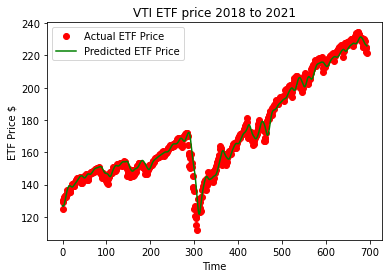

In [30]:
plt.plot(actual_price, 'o' , color = 'red', label = 'Actual ETF Price')
plt.plot(predicted_price1, color = 'green', label = 'Predicted ETF Price')
plt.title('VTI ETF price 2018 to 2021')
plt.xlabel('Time')
plt.ylabel('ETF Price $')
plt.legend()
plt.show()

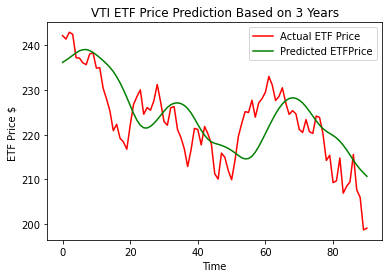

In [31]:
plt.plot(y_test, color = 'red', label = 'Actual ETF Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted ETFPrice')
plt.title('VTI ETF Price Prediction Based on 3 Years')
plt.xlabel('Time')
plt.ylabel('ETF Price $ ')
plt.legend()
plt.show()

In [32]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(actual_price, predicted_price1))}\t{np.sqrt(mse(y_test, predicted_price))}
{'MAPE'.ljust(10)}{mape(actual_price, predicted_price1)}\t{mape(y_test, predicted_price)}
'''
print(scores)


Metric           Train                Test        
RMSE      4.467461166709086	6.649721248738161
MAPE      0.018455157979023668	0.025328287549844637

